In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import sys, os
from pathlib import Path

%run C:/Users/amara/Documents/Formation_DS_DataScientest/Projet_DS_DataScientest_BCC/Blood_Cells_Classification/6-Final_code/00-UTILS/Crosstables_HSA.py

In [2]:
root_path = 'C:/Users/amara/Documents/Formation_DS_DataScientest/Projet_DS_DataScientest_BCC/Blood_Cells_Classification'

#root_path = '/content/drive/MyDrive/Projet_DS_DataScientest_BCC'
data_path = f'{root_path}/2-Data'

In [3]:
img_df = pd.read_csv(f'{data_path}/BCC_dataset_fin_woOutliers.csv')

C:\Users\amara\AppData\Local\Temp\ipykernel_19812\3660797764.py:1: DtypeWarning: Columns (12,13,14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  img_df = pd.read_csv(f'{data_path}/BCC_dataset_fin_woOutliers.csv')


### Regroupement des classes IG, MMY, PYC et MYC en une classe IG

In [4]:
# Remplacer les valeurs MMC, MYC et PYC par IG dans la colonne "blood_cell"
img_df['blood_cell'] = img_df['blood_cell'].replace(['IG', 'MMC', 'MYC', 'PYC'], 'IG')
img_df.head()

,img_id,blood_cell_original,image_path,source,extension,height,width,channels,depth,mean_luminance,...,Patient_ID,slide_type,Diagnosis,Cohort,Age at Diagnosis,Gender,cell_category,blood_cell,brightness,luminance
0,BA_100102,Basophil,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,201.010843,...,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS,227.090579,201.009514
1,BA_101381,Basophil,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,194.197834,...,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS,221.648225,194.196219
2,BA_101611,Basophil,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,193.350826,...,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS,222.109144,193.343202
3,BA_102039,Basophil,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,188.760063,...,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS,217.042068,188.754761
4,BA_102750,Basophil,C:/Users/amara/Documents/Formation_DS_DataScie...,Barcelona,.jpg,363,360,3,uint8,203.143595,...,NaN,NaN,NaN,NaN,NaN,NaN,basophil,BAS,229.331057,203.136620


In [10]:
print_crosstables(img_df)

source,Barcelona,Kaggle,Munich,Raabin,Total,% Total,Barcelona %,Kaggle %,Munich %,Raabin %
blood_cell,,,,,,,,,,
ART,0,2992,15,0,3007,4.447172,0.000000,99.501164,0.498836,0.000000
BAS,1218,53,79,289,1639,2.423982,74.313606,3.233679,4.820012,17.632703
EOS,3117,108,422,1063,4710,6.965807,66.178344,2.292994,8.959660,22.569002
ERY,1551,526,78,0,2155,3.187115,71.972158,24.408353,3.619490,0.000000
IG,2895,922,145,0,3962,5.859560,73.069157,23.271075,3.659768,0.000000
LYM,1214,3998,3947,3585,12744,18.847610,9.526051,31.371626,30.971438,28.130885
MON,1420,1385,1814,792,5411,8.002544,26.242839,25.596008,33.524302,14.636851
MYB,0,3327,3253,0,6580,9.731425,0.000000,50.562310,49.437690,0.000000
NEU,3329,2305,8587,10751,24972,36.932087,13.330931,9.230338,34.386513,43.052218


### Création du  jeu d'entraînement, de validation et de test

In [7]:
# Diviser les données en jeu de données d'entraînement et de test
train_data, test_data = train_test_split(img_df, test_size=0.2, random_state=42, 
                                         stratify=img_df['blood_cell'])

# Diviser le jeu de données d'entraînement en jeu de données d'entraînement et de validation
train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=42, 
                                               stratify=train_data['blood_cell'])

# Enregistrer les données dans des fichiers CSV séparés
train_data.to_csv(f'{data_path}/BCC_train_dataset_10cat.csv', index=False)
validation_data.to_csv(f'{data_path}/BCC_val_dataset_10cat.csv', index=False)
test_data.to_csv(f'{data_path}/BCC_test_dataset_10cat.csv', index=False) 

### Répartition des classes du set d'entraînement, de validation et de test

In [8]:
print_crosstables(train_data)
print_crosstables(validation_data)
print_crosstables(test_data)

source,Barcelona,Kaggle,Munich,Raabin,Total,% Total,Barcelona %,Kaggle %,Munich %,Raabin %
blood_cell,,,,,,,,,,
ART,0,1914,11,0,1925,4.448501,0.000000,99.428571,0.571429,0.000000
BAS,784,43,43,179,1049,2.424144,74.737846,4.099142,4.099142,17.063870
EOS,1994,74,262,684,3014,6.965082,66.157930,2.455209,8.692767,22.694094
ERY,993,339,47,0,1379,3.186745,72.008702,24.583031,3.408267,0.000000
IG,1842,607,86,0,2535,5.858156,72.662722,23.944773,3.392505,0.000000
LYM,788,2558,2518,2292,8156,18.847780,9.661599,31.363413,30.872977,28.102011
MON,929,884,1156,494,3463,8.002681,26.826451,25.527000,33.381461,14.265088
MYB,0,2146,2065,0,4211,9.731241,0.000000,50.961767,49.038233,0.000000
NEU,2133,1452,5532,6865,15982,36.932961,13.346265,9.085221,34.613941,42.954574


source,Barcelona,Kaggle,Munich,Raabin,Total,% Total,Barcelona %,Kaggle %,Munich %,Raabin %
blood_cell,,,,,,,,,,
ART,0,480,1,0,481,4.445882,0.000000,99.792100,0.207900,0.000000
BAS,196,5,13,48,262,2.421666,74.809160,1.908397,4.961832,18.320611
EOS,505,15,64,170,754,6.969221,66.976127,1.989390,8.488064,22.546419
ERY,244,85,16,0,345,3.188834,70.724638,24.637681,4.637681,0.000000
IG,474,138,22,0,634,5.860061,74.763407,21.766562,3.470032,0.000000
LYM,189,659,587,604,2039,18.846474,9.269250,32.319765,28.788622,29.622364
MON,229,230,284,123,866,8.004437,26.443418,26.558891,32.794457,14.203233
MYB,0,489,564,0,1053,9.732877,0.000000,46.438746,53.561254,0.000000
NEU,544,393,1393,1665,3995,36.925779,13.617021,9.837297,34.868586,41.677096


source,Barcelona,Kaggle,Munich,Raabin,Total,% Total,Barcelona %,Kaggle %,Munich %,Raabin %
blood_cell,,,,,,,,,,
ART,0,598,3,0,601,4.443951,0.000000,99.500832,0.499168,0.000000
BAS,238,5,23,62,328,2.425318,72.560976,1.524390,7.012195,18.902439
EOS,618,19,96,209,942,6.965395,65.605096,2.016985,10.191083,22.186837
ERY,314,102,15,0,431,3.186927,72.853828,23.665893,3.480278,0.000000
IG,579,177,37,0,793,5.863650,73.013871,22.320303,4.665826,0.000000
LYM,237,781,842,689,2549,18.847974,9.297764,30.639466,33.032562,27.030208
MON,262,271,374,175,1082,8.000592,24.214418,25.046211,34.565619,16.173752
MYB,0,692,624,0,1316,9.730849,0.000000,52.583587,47.416413,0.000000
NEU,652,460,1662,2221,4995,36.934339,13.053053,9.209209,33.273273,44.464464


### Graphiques de répartition des classes de PBC

##### 1. Répartition des cellules sanguines toutes sources confondues

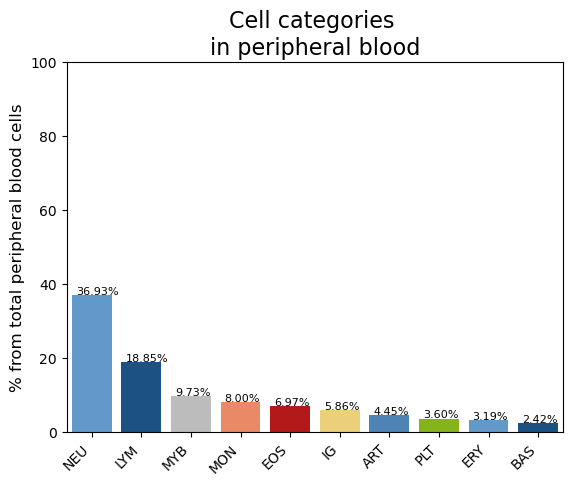

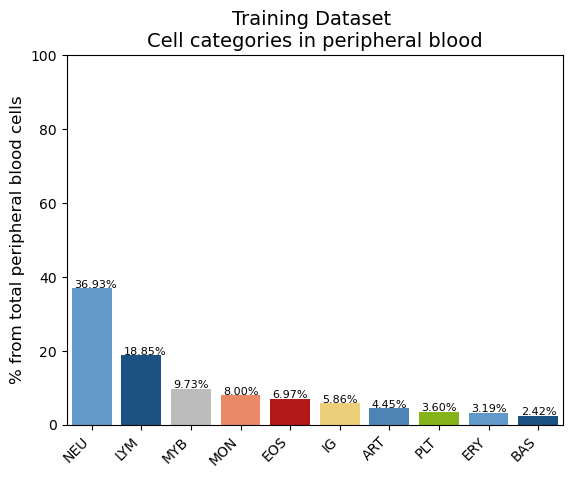

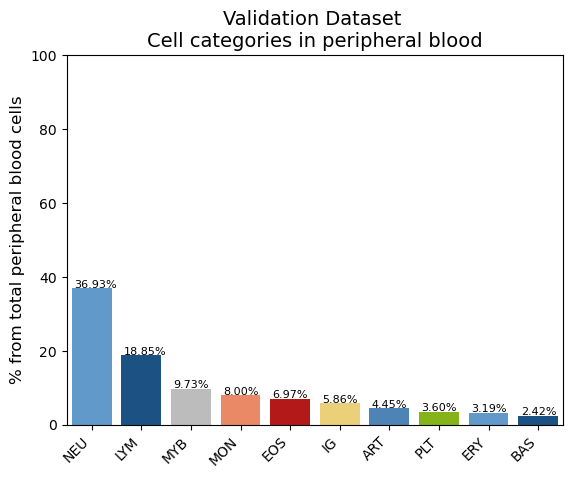

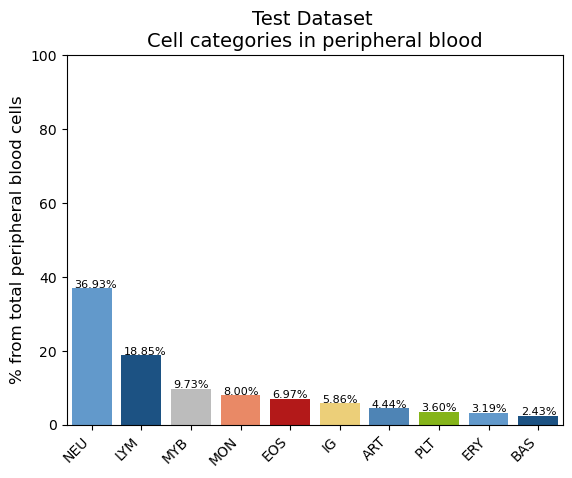

In [12]:
colors =['#509add', '#0b5394', '#bcbcbc', '#ff7f50', '#cc0000','#ffd966', '#3d85c6', '#8fce00']

### Barplot : Cell categories for the whole dataset (wo images outliers)
df_temp = img_df['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.sort_values(ascending=False)

sns.barplot(x=df_temp.index, y=df_temp.values, palette= colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.ylabel('% from total peripheral blood cells', fontsize =12)
plt.title("Cell categories \nin peripheral blood", fontsize= 16)
for i in range(len(df_temp)):
    plt.text(x = i-0.32, y = df_temp.values[i]+0.2, s = f"{df_temp.values[i]:.2f}%", size = 8)
plt.show()
plt.savefig("barplot_cells_wo_10cat.png", dpi=300, bbox_inches='tight')

### Barplot : Cell categories for the train dataset (wo images outliers)
df_temp = train_data['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.sort_values(ascending=False)
sns.barplot(x=df_temp.index, y=df_temp.values, palette= colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.ylabel('% from total peripheral blood cells', fontsize =12)
plt.title("Training Dataset \nCell categories in peripheral blood", fontsize= 14)
for i in range(len(df_temp)):
    plt.text(x = i-0.35, y = df_temp.values[i]+0.2, s = f"{df_temp.values[i]:.2f}%", size = 8)
plt.show()
plt.savefig("barplot_cells_wo_10cat_training.png", dpi=300, bbox_inches='tight')

### Barplot : Cell categories for validation dataset (wo images outliers)
df_temp = validation_data['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.sort_values(ascending=False)
sns.barplot(x=df_temp.index, y=df_temp.values, palette= colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.ylabel('% from total peripheral blood cells', fontsize =12)
plt.title("Validation Dataset \nCell categories in peripheral blood", fontsize= 14)
for i in range(len(df_temp)):
    plt.text(x = i-0.35, y = df_temp.values[i]+0.2, s = f"{df_temp.values[i]:.2f}%", size = 8)
plt.show()
plt.savefig("barplot_cells_wo_10cat_valid.png", dpi=300, bbox_inches='tight')

### Barplot : Cell categories for test dataset (wo images outliers)
df_temp = test_data['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.sort_values(ascending=False)
sns.barplot(x=df_temp.index, y=df_temp.values, palette= colors)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.ylabel('% from total peripheral blood cells', fontsize =12)
plt.title("Test Dataset \nCell categories in peripheral blood", fontsize= 14)
for i in range(len(df_temp)):
    plt.text(x = i-0.35, y = df_temp.values[i]+0.2, s = f"{df_temp.values[i]:.2f}%", size = 8)

plt.savefig("barplot_cells_wo_10cat_test.png", dpi=300, bbox_inches='tight')

##### 2. Répartition des cellules sanguines suvant les sources de données

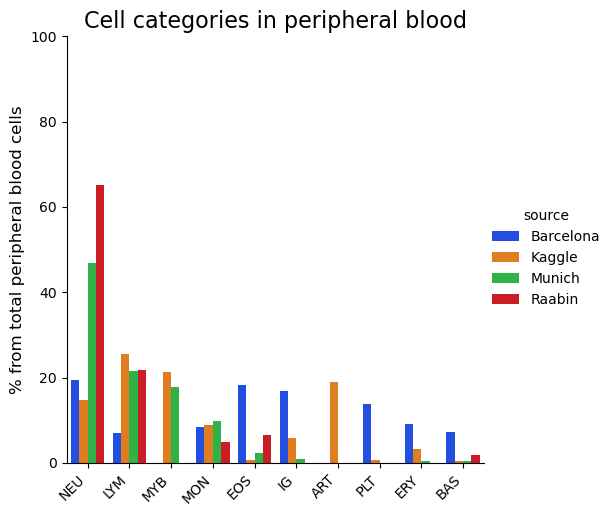

<Figure size 640x480 with 0 Axes>

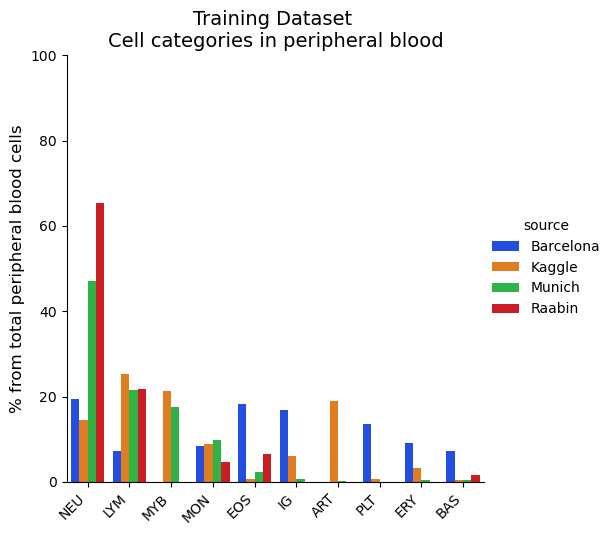

<Figure size 640x480 with 0 Axes>

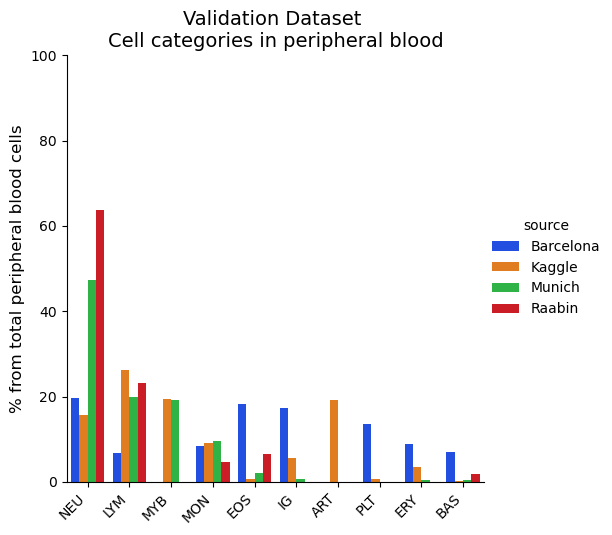

<Figure size 640x480 with 0 Axes>

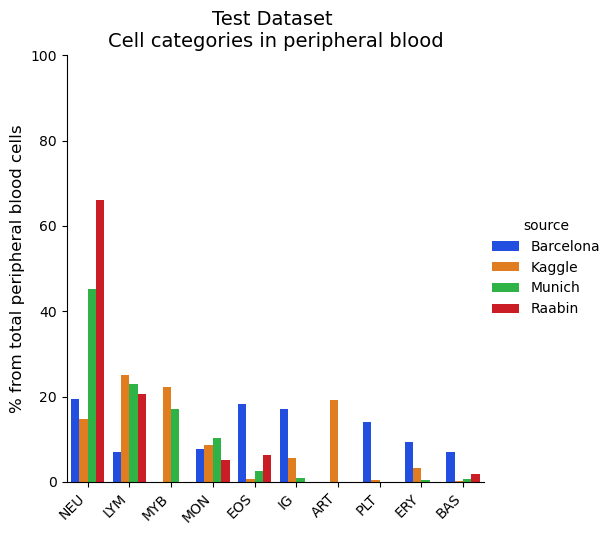

<Figure size 640x480 with 0 Axes>

In [14]:
colors =['#509add', '#0b5394', '#bcbcbc', '#ff7f50', '#cc0000','#ffd966', '#3d85c6', '#8fce00']
order = ['NEU', 'LYM', 'MYB', 'MON', 'EOS', 'IG', 'ART', 'PLT', 'ERY', 'BAS']

### Barplot : Cell categories for the whole dataset (wo images outliers) by source of data
df_temp = img_df.groupby('source')['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.reset_index(name='%')

sns.catplot(x='blood_cell', y='%', hue='source', data=df_temp, kind='bar', palette='bright', order=order)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.xlabel('')
#plt.legend(loc='upper right',)
plt.ylabel('% from total peripheral blood cells', fontsize=12)
plt.title("Cell categories in peripheral blood", fontsize=16)
plt.show()
plt.savefig("barplot_cells_wo_10cat_bysource.png", dpi=300, bbox_inches='tight')

### Barplot : Cell categories for the whole dataset (wo images outliers) by training/val/test data
df_temp = train_data.groupby('source')['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.reset_index(name='%')

sns.catplot(x='blood_cell', y='%', hue='source', data=df_temp, kind='bar', palette='bright', order=order)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.xlabel('')
#plt.legend(loc='upper right',)
plt.ylabel('% from total peripheral blood cells', fontsize=12)
plt.title("Training Dataset \nCell categories in peripheral blood", fontsize=14)
plt.show()
plt.savefig("barplot_cells_wo_10cat_bysource_train.png", dpi=300, bbox_inches='tight')

### Barplot : Cell categories for the whole dataset (wo images outliers) by training/val/test data
df_temp = validation_data.groupby('source')['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.reset_index(name='%')

sns.catplot(x='blood_cell', y='%', hue='source', data=df_temp, kind='bar', palette='bright', order=order)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.xlabel('')
#plt.legend(loc='upper right',)
plt.ylabel('% from total peripheral blood cells', fontsize=12)
plt.title("Validation Dataset \nCell categories in peripheral blood", fontsize=14)
plt.show()
plt.savefig("barplot_cells_wo_10cat_bysource_valid.png", dpi=300, bbox_inches='tight')

### Barplot : Cell categories for the whole dataset (wo images outliers) by training/val/test data
df_temp = test_data.groupby('source')['blood_cell'].value_counts(normalize=True) * 100
df_temp = df_temp.reset_index(name='%')
sns.catplot(x='blood_cell', y='%', hue='source', data=df_temp, kind='bar', palette='bright', order=order)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # définir la limite supérieure de l'axe des y à 100
plt.xlabel('')
#plt.legend(loc='upper right',)
plt.ylabel('% from total peripheral blood cells', fontsize=12)
plt.title("Test Dataset \nCell categories in peripheral blood", fontsize=14)
plt.show()
plt.savefig("barplot_cells_wo_10cat_bysource_test.png", dpi=300, bbox_inches='tight')